In [5]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Navneet\Downloads\Dataset  (2).csv")  # removed the extra quotes
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Fill missing values (quick fix: forward fill)
df.fillna(method='ffill', inplace=True)

# Confirm cleanup
print("\nMissing values after cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Missing values after cleaning:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering

C:\Users\Navneet\AppData\Local\Temp\ipykernel_4524\983003435.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns to encode:", list(categorical_cols))

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


Categorical columns to encode: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


In [10]:
# Drop columns that don't help prediction (like restaurant name or ID)
cols_to_drop = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Define features (X) and target (y)
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']

print("\n✅ Features and target defined successfully.")
print("X shape:", X.shape)
print("y shape:", y.shape)




✅ Features and target defined successfully.
X shape: (9551, 15)
y shape: (9551,)


In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split complete.")
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

✅ Data split complete.
Training set size: (7640, 15)
Test set size: (1911, 15)


In [12]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model training complete.")

✅ Model training complete.


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Mean Squared Error (MSE): {mse:.2f}")
print(f"📈 R-squared (R² Score): {r2:.2f}")

📊 Mean Squared Error (MSE): 1.30
📈 R-squared (R² Score): 0.43


C:\Users\Navneet\AppData\Local\Temp\ipykernel_4524\2237267644.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
C:\Users\Navneet\AppData\Local\Temp\ipykernel_4524\2237267644.py:20: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Navneet\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


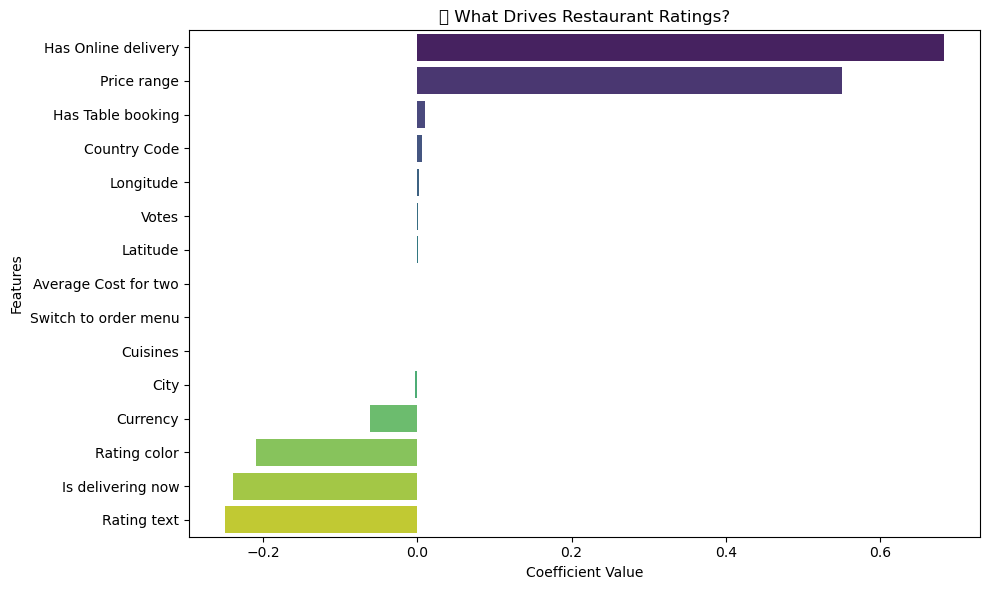

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from model coefficients
importance = model.coef_
features = X.columns

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("🔍 What Drives Restaurant Ratings?")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Navneet\Downloads\Dataset  (2).csv")

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Ensure key columns exist before dropping rows
key_cols = ["Price range", "Has Online delivery", "Has Table booking", "Aggregate rating"]
missing_cols = [col for col in key_cols if col not in df.columns]

if missing_cols:
    print(f"\n⚠️ Warning: These columns are missing in your dataset: {missing_cols}")
else:
    # Drop rows with missing values in key columns
    df = df.dropna(subset=key_cols)

    # Convert Yes/No columns to numeric (Yes → 1, No → 0)
    df["Has Online delivery"] = df["Has Online delivery"].map({"Yes": 1, "No": 0}).fillna(0)
    df["Has Table booking"] = df["Has Table booking"].map({"Yes": 1, "No": 0}).fillna(0)

    print("\n✅ Cleaned dataset sample:")
    print(df.head())


Missing values per column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

✅ Cleaned dataset sample:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4      

In [7]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df[["Price range", "Has Online delivery", "Has Table booking"]]
y = df["Aggregate rating"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
import joblib

joblib.dump(model, "model.pkl")

['model.pkl']

In [10]:
import ipywidgets as widgets
from IPython.display import display

# Create widgets
price_range = widgets.IntSlider(value=2, min=1, max=4, description='Price Range')
online_delivery = widgets.ToggleButtons(options=[1, 0], description='Online Delivery')
table_booking = widgets.ToggleButtons(options=[1, 0], description='Table Booking')
predict_button = widgets.Button(description='Predict Rating')

# Display widgets
display(price_range, online_delivery, table_booking, predict_button)

# Define prediction function
def predict_rating(b):
    input_data = [[price_range.value, online_delivery.value, table_booking.value]]
    predicted = model.predict(input_data)
    print(f"🌟 Predicted Rating: {predicted[0]:.2f}")

# Bind function to button
predict_button.on_click(predict_rating)

IntSlider(value=2, description='Price Range', max=4, min=1)

ToggleButtons(description='Online Delivery', options=(1, 0), value=1)

ToggleButtons(description='Table Booking', options=(1, 0), value=1)

Button(description='Predict Rating', style=ButtonStyle())

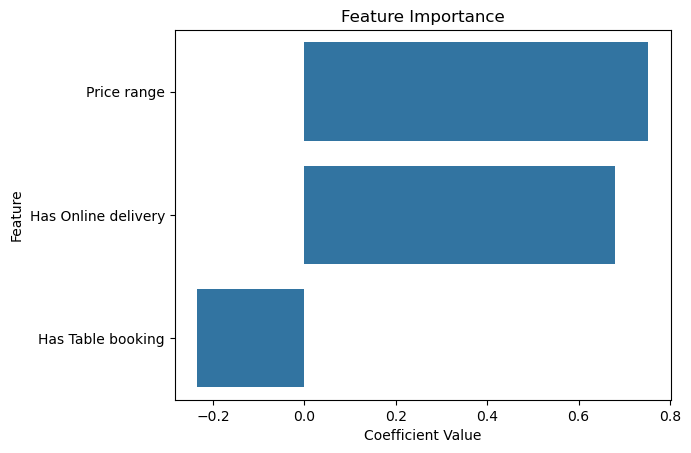

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

importance = model.coef_
features = X.columns

sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()